In [3]:
import os

def get_dynamic_path(path):
  if os.name == "nt":
    return path.replace("/", "\\")
  else:
    return path


In [4]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(
    subset='all', remove=('headers', 'footers', 'quotes'))
data  = newsgroups.data
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, newsgroups.target, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(X_train_tfidf, y_train)

# Save the model and vectorizer
path = get_dynamic_path("model\knn")
joblib.dump(knn_classifier, path+'knn_model.joblib')
joblib.dump(vectorizer, path+'\tfidf_vectorizer.joblib')

# Predictions on the test set
y_pred = knn_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(
    y_test, y_pred, target_names=newsgroups.target_names)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.12

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.64      0.14      0.23       151
           comp.graphics       0.85      0.05      0.10       202
 comp.os.ms-windows.misc       0.06      0.98      0.11       195
comp.sys.ibm.pc.hardware       0.83      0.05      0.10       183
   comp.sys.mac.hardware       0.85      0.08      0.15       205
          comp.windows.x       0.91      0.15      0.26       215
            misc.forsale       0.83      0.05      0.10       193
               rec.autos       0.71      0.03      0.05       196
         rec.motorcycles       0.86      0.04      0.07       168
      rec.sport.baseball       0.17      0.11      0.13       211
        rec.sport.hockey       0.95      0.10      0.17       198
               sci.crypt       1.00      0.03      0.07       201
         sci.electronics       0.89      0.04      0.08       202
                 sci.med       0.96

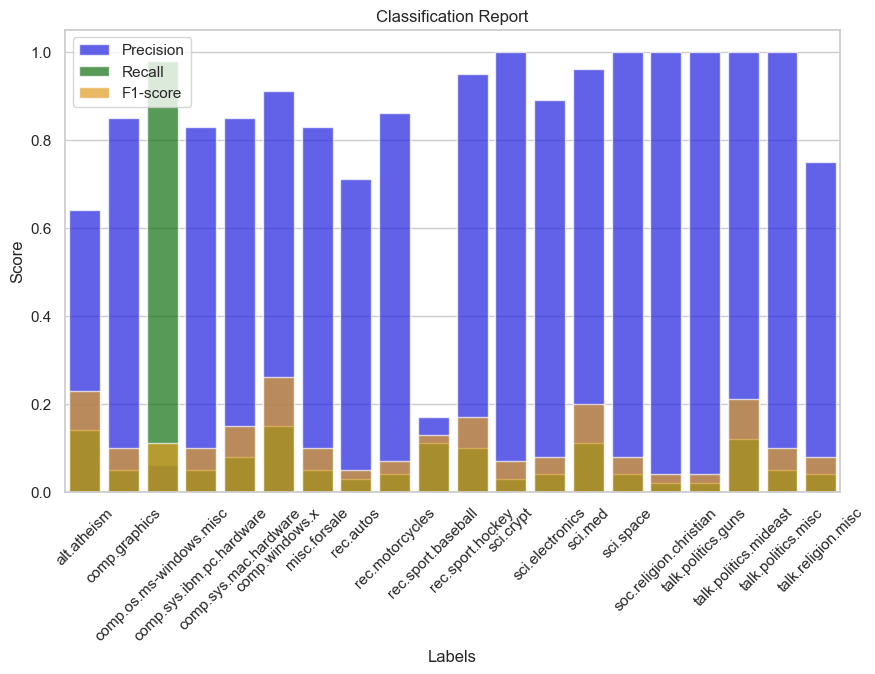

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the classification report data
report_data = classification_rep.split('\n')[2:-5]
labels = []
precision = []
recall = []
f1_score = []

for row in report_data:
    row_data = row.split()
    labels.append(row_data[0])
    precision.append(float(row_data[1]))
    recall.append(float(row_data[2]))
    f1_score.append(float(row_data[3]))

# Plotting precision, recall, and F1-score
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=labels, y=precision, color='blue', alpha=0.7, label='Precision')
sns.barplot(x=labels, y=recall, color='green', alpha=0.7, label='Recall')
sns.barplot(x=labels, y=f1_score, color='orange', alpha=0.7, label='F1-score')
plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Score')
plt.title('Classification Report')
plt.legend()
plt.show()
